In [105]:
import h5py as h5
import os
import matplotlib.pyplot as plt
from probabalistic_displacement_scripts import get_exceedance_bar_chart_data
import numpy as np
import pandas as pd

# os.chdir(os.path.dirname(os.path.abspath(__file__)))
results_dir = os.path.join('..', 'results', 'fq_hikkerm')

h5_file = os.path.join(results_dir, 'weighted_mean_PPE_dict_uniform.h5')


time_interval = [5, 10, 15, 20, 30, 40, 50, 60, 70, 80, 90, 100, 125, 150]

probabilities = [2, 10, 33, 50, 67]  # Probability that the displacement will exceed
probabilities = [p for p in range(5, 100, 5)]
probabilities.sort()

interseismic_vlm = 0 # mm/yr
interseismic_uc = 1

site_list = os.path.join('..', 'sites', 'JDE_sites.csv')
site_list = list(pd.read_csv(site_list)['siteId'])

PPEh5 = h5.File(h5_file, 'r')

sigma_lims = PPEh5['sigma_lims'][:]
error_ix = [ix for ix in range(len(sigma_lims))]

exceed_type = 'down'

ups = np.zeros((len(probabilities), len(time_interval), len(site_list)))
downs = np.zeros((len(probabilities), len(time_interval), len(site_list)))

In [106]:
time_interval = np.array(time_interval)
for pix, probability in enumerate(probabilities):
    for tix, interval in enumerate(time_interval):
        ups[pix, tix, :] = get_exceedance_bar_chart_data(site_PPE_dictionary=PPEh5, exceed_type='up', site_list=site_list, probability=probability / 100, weighted=True, interval=str(interval))
        downs[pix, tix, :] = get_exceedance_bar_chart_data(site_PPE_dictionary=PPEh5, exceed_type='down', site_list=site_list, probability=probability / 100, weighted=True, interval=str(interval))
PPEh5.close()

In [107]:
vlm = time_interval * (interseismic_vlm / 1000)
vlm_plus = time_interval * ((interseismic_vlm + interseismic_uc) / 1000)
vlm_minus = time_interval * ((interseismic_vlm - interseismic_uc) / 1000)
plot_crosses = False
if plot_crosses:
    for six, site in enumerate(site_list):
        ymax = np.ceil(ups[:, :, six].max() * 4) / 4
        ymin = np.floor(downs[:, :, six].min()) * 4 / 4
        fig, axs = plt.subplots(1, 2, figsize=(10, 4))
        ax = plt.subplot(1, 2, 1)
        ax.plot(time_interval, vlm, color='black', linestyle='-')
        ax.fill_between(time_interval, vlm_plus, vlm_minus, color='black', alpha=0.2)
        for pix, probability in enumerate(probabilities):
            ax.scatter(time_interval, vlm + ups[pix, :, six], marker='x', color=plt.cm.viridis(np.log10(probability / 10)), label=f'{probability}% PPE')
            ax.scatter(time_interval, vlm + downs[pix, :, six], marker='x', color=plt.cm.viridis(np.log10(probability / 10)))
        plt.xlabel('Time Interval (years)')
        plt.ylabel('Displacement (m)')
        ax.legend()
        ax.set_title('PPE')
        ax.set_ylim(ymin, ymax)

        ax = plt.subplot(1, 2, 2)
        ax.plot(time_interval, vlm, color='black', linestyle='-', label=f'{interseismic_vlm} mm/yr VLM')
        ax.fill_between(time_interval, vlm_plus, vlm_minus, color='black', alpha=0.2, label=f'+/-{interseismic_uc} mm/yr')
        for pix, probability in enumerate(probabilities):
            ax.scatter(time_interval, vlm + ups[pix, :, six], marker='x', color=plt.cm.viridis(np.log10((100 - probability) / 10)), label=f'{100 - probability}% Limit')
            ax.scatter(time_interval, vlm + downs[pix, :, six], marker='x', color=plt.cm.viridis(np.log10((100 - probability) / 10)))
        plt.xlabel('Time Interval (years)')
        ax.legend()
        ax.set_title('Limit')
        ax.set_ylim(ymin, ymax)

        fig.suptitle(f'{site}')
        plt.show()



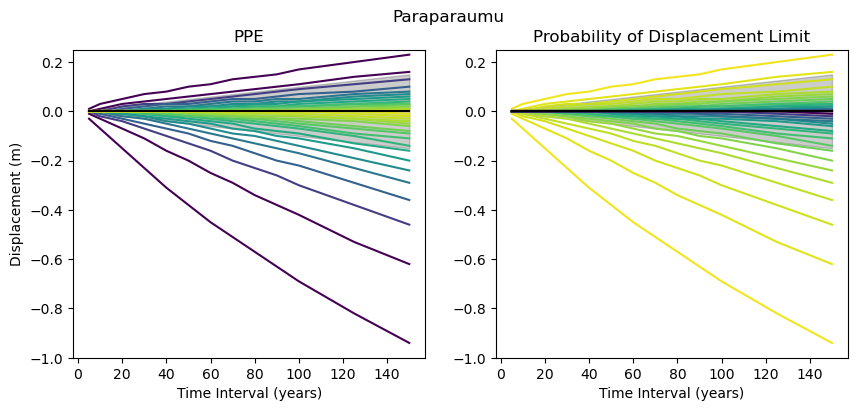

In [110]:
plot_lines = True
if plot_lines:
    for six, site in enumerate(site_list[:1]):
        ymax = np.ceil((ups[:, :, six] + vlm).max() * 4) / 4
        ymin = np.floor((downs[:, :, six] + vlm).min()) * 4 / 4
        fig, axs = plt.subplots(1, 2, figsize=(10, 4))
        ax = plt.subplot(1, 2, 1)
        ax.plot(time_interval, vlm, color='black', linestyle='-', zorder=2)
        ax.fill_between(time_interval, vlm_plus, vlm_minus, color='black', alpha=0.2)
        for pix, probability in enumerate(probabilities):
            ax.plot(time_interval, vlm + ups[pix, :, six], color=plt.cm.viridis(np.log10(probability / 10)), label=f'{probability}% PPE', zorder=1)
            ax.plot(time_interval, vlm + downs[pix, :, six], color=plt.cm.viridis(np.log10(probability / 10)), zorder=1)
        plt.xlabel('Time Interval (years)')
        plt.ylabel('Displacement (m)')
        # ax.legend()
        ax.set_title('PPE')
        ax.set_ylim(ymin, ymax)

        ax = plt.subplot(1, 2, 2)
        ax.plot(time_interval, vlm, color='black', linestyle='-', label=f'{interseismic_vlm} mm/yr VLM', zorder=len(probabilities))
        ax.fill_between(time_interval, vlm_plus, vlm_minus, color='black', alpha=0.2, label=f'+/-{interseismic_uc} mm/yr')
        for pix, probability in enumerate(probabilities):
            ax.plot(time_interval, vlm + ups[pix, :, six], color=plt.cm.viridis(np.log10((100 - probability) / 10)), label=f'{100 - probability}% Limit', zorder=pix)
            ax.plot(time_interval, vlm + downs[pix, :, six], color=plt.cm.viridis(np.log10((100 - probability) / 10)), zorder=pix)
        plt.xlabel('Time Interval (years)')
        # ax.legend()
        ax.set_title('Probability of Displacement Limit')
        ax.set_ylim(ymin, ymax)
        fig.suptitle(f'{site}')
        plt.show()
